# Hero Moto Corp Stock Analysis Using ARIMA

## Analysis
In order to realise the following code exercise, I made use of the following libraries and dependencies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA

First of all, I loaded the specific Hero moto corp dataset among all the other available. This dataset is composed of six different features. I will just examine the “Open” stock prices feature. This same analysis can be repeated for most of the other features.

In [2]:
df = pd.read_csv(r'C:\Users\hritwick.manna24\Downloads\HEROMOTOCO.NS.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/24/2020,2220.000000,2220.000000,2175.000000,2184.199951,2161.479492,808263
1,2/25/2020,2190.199951,2214.000000,2164.050049,2184.149902,2161.429932,861921
2,2/26/2020,2180.000000,2195.000000,2136.000000,2142.550049,2120.262695,972076
3,2/27/2020,2147.899902,2158.649902,2101.000000,2110.250000,2088.298828,1093297
4,2/28/2020,2080.000000,2110.000000,2033.949951,2051.750000,2030.407349,1879071


Before starting working on Time Series prediction, I decided to analyse the autocorrelation plot of the “Open” feature with respect to a fixed lag of 3. The results shown down confirmed the ARIMA would have been a good model to be applied to this type of data.

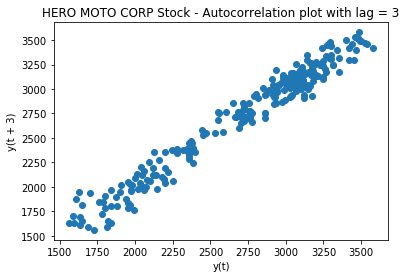

In [3]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('HERO MOTO CORP Stock - Autocorrelation plot with lag = 3')
plt.show()

Successively, I divided the data into a training and test set. Once done so, I plotted both on the same figure in order to get a feeling of how does our Time Series looks like

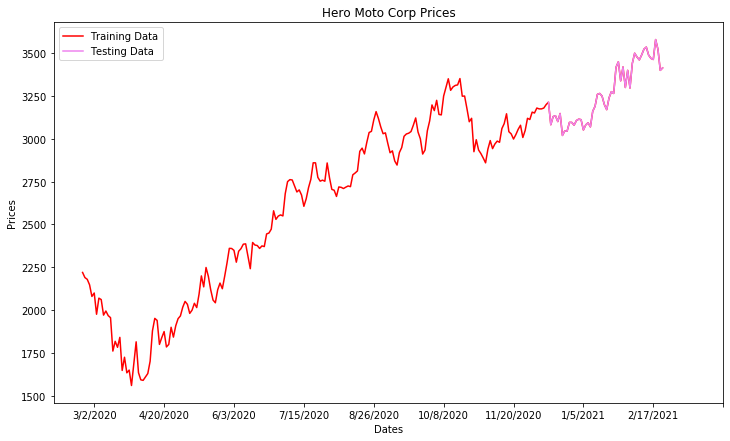

In [4]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Hero Moto Corp Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'red', label='Training Data')
plt.plot(test_data['Open'], 'violet', label='Testing Data')
plt.xticks(np.arange(5,300,30), df['Date'][5:300:30])
plt.legend()

In order to evaluate the ARIMA model, I decided to use Symmetric Mean Absolute Percentage Error (SMAPE). SMAPE is commonly used as an accuracy measure based on relative errors.

SMAPE is not currently supported in Scikit-learn as a loss function I, therefore, had first to create this function on my own.

In [5]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/3000/1*0SdvMiwgPZ350rmdVDNwGA.png", width=300, height=100)

The ARIMA model makes use of three main parameters (p,d,q). These are:

#### 1) p = number of lag observations.
#### 2) d = the degree of differencing.
#### 3) q = the size of the moving average window.

I decided to set in this case p=3, d=1 and q=0 as the ARIMA parameters.

In [7]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
   
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Symmetric mean absolute percentage error: 5.817


The loss result for this model are available above. According to the SMAPE is quite low. SMAPE is commonly used loss a loss function for Time Series problems and can, therefore, provide a more reliable analysis.The above result showed there is still room for improvement of our model.

Finally, I decided to plot the training, test and predicted prices against time to visualize how did the model performed against the actual prices

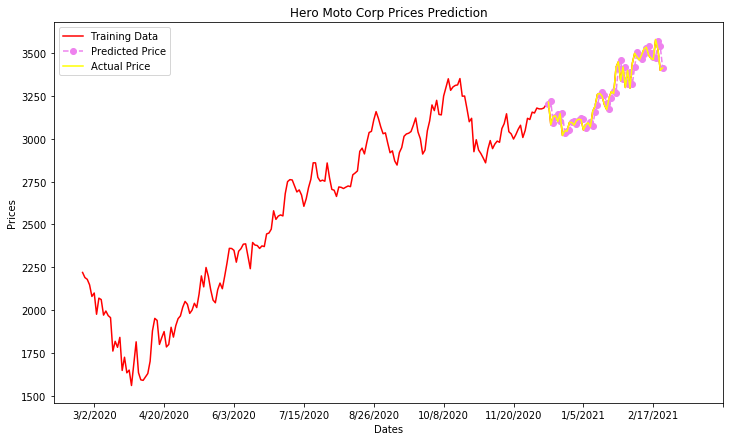

In [8]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='red', label='Training Data')
plt.plot(test_data.index, predictions, color='violet', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='yellow', label='Actual Price')
plt.title('Hero Moto Corp Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(5,300,30), df['Date'][5:300:30])
plt.legend()

The below figure provides instead a zoomed in version of above Figure. From this can be noticed how the two curves closely follow each other. However, the predicted price seems to look like a “noisy” version of the actual price.

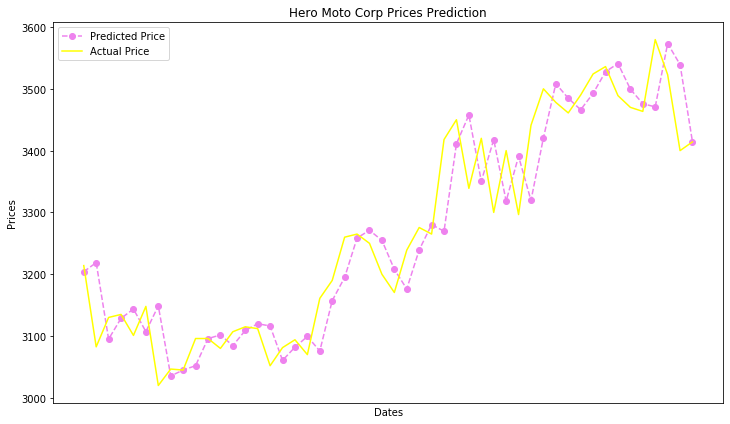

In [9]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='violet', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='yellow', label='Actual Price')
plt.xticks(np.arange(0,100,100), df['Date'][0:100:100])
plt.title('Hero Moto Corp Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

This analysis using ARIMA lead overall to appreciable results. 